<div style="color: navy; background-color: skyblue; border: 2px solid navy; padding: 5px;">
  <p style="text-align: center;font-size: 200%">pyLBM : the geometry</p>
</div>

With pyLBM, the numerical simulations can be performed in a domain with a complex geometry. This geometry is construct without considering a particular mesh but only with geometrical objects. All the geometrical informations are defined through a dictionary and put into an object of the class `Geometry`.

First, the domain is put into a `box`: a segment in 1D, a rectangle in 2D, and a rectangular parallelepipoid in 3D.

In [1]:
import pyLBM
import numpy as np
%config InlineBackend.figure_format = 'retina'

<div style="color: navy; background-color: skyblue; border: 2px solid navy; padding: 5px;">
  <p style="text-align: center;font-size: 150%">In dimension 1</p>
</div>

The geometry is described by a dictionary. In dimension 1, we have only to prescribe the key `box` that has to be a dictionay containing
* the left and the right bounds with the key `x`
* the labels (by default each label is -1) with the key `label`

The geometry can be visualize as in the following examples.

Geometry informations
	 spatial dimension: 1
	 bounds of the box: 
[[ 0.  1.]]



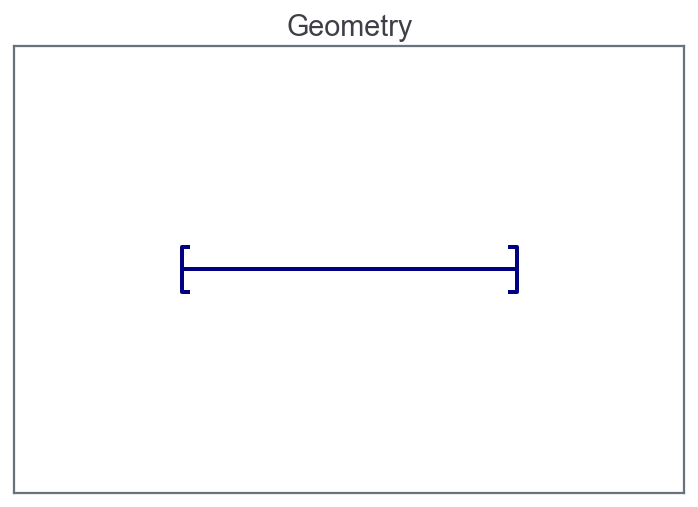

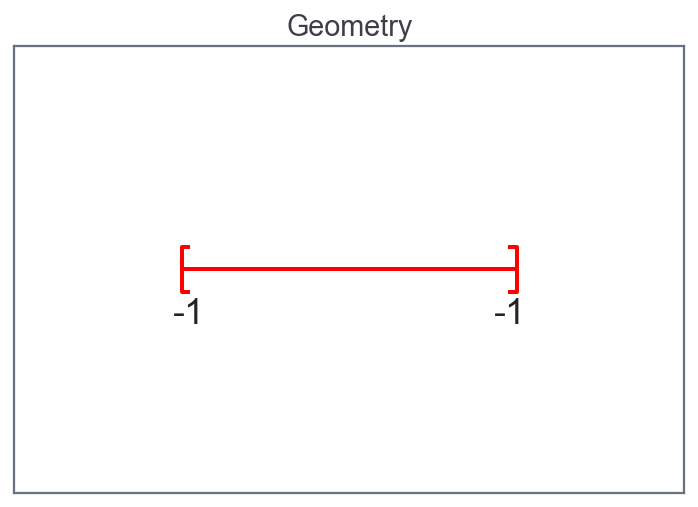

In [2]:
xmin, xmax = 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax]},
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize()
geom.visualize(viewlabel=True, fluid_color='red')

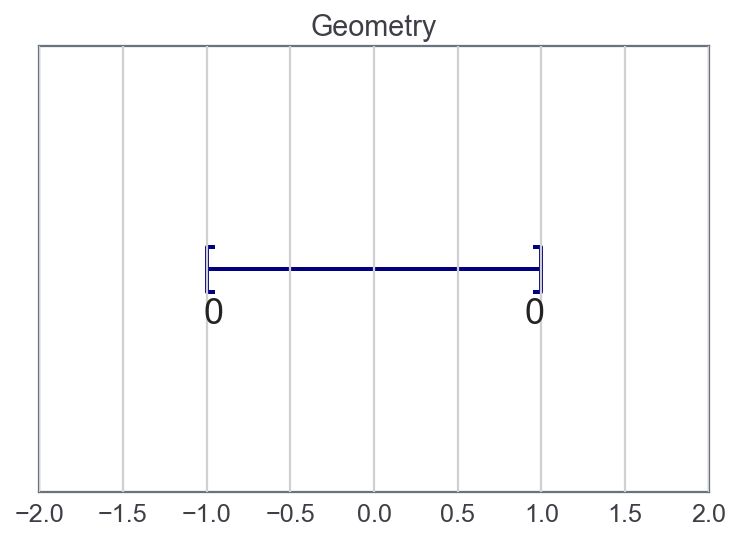

In [3]:
xmin, xmax = -1., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'label': 0},
}
geom = pyLBM.Geometry(dico_geom)
geom.visualize(viewlabel=True, viewgrid=True, fluid_color='navy')

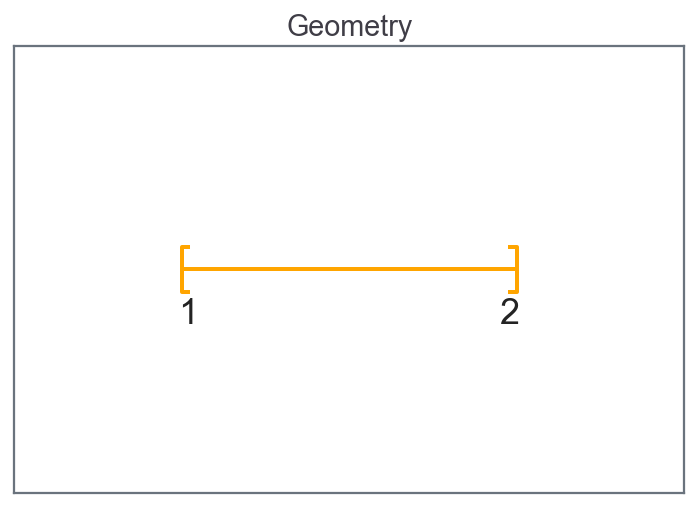

In [4]:
xmin, xmax = -1., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'label': [1,2]},
}
geom = pyLBM.Geometry(dico_geom)
geom.visualize(viewlabel=True, fluid_color='orange')

<div style="color: navy; background-color: skyblue; border: 2px solid navy; padding: 5px;">
  <p style="text-align: center;font-size: 150%">In dimension 2</p>
</div>

In dimension 2, the geometry is also described in a dictionary : the key `box` has to be a dictionary that contains
* the left and the right bounds with the key `x`
* the bottom and the top bounds with the key `y`
* the labels (by default each label is -1) with the key `label`

The geometry can be visualize as in the following examples.

Geometry informations
	 spatial dimension: 2
	 bounds of the box: 
[[ 0.  2.]
 [ 0.  1.]]



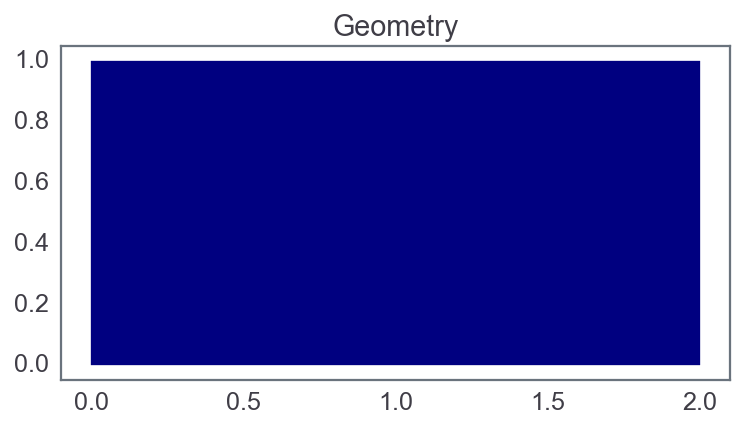

In [5]:
xmin, xmax, ymin, ymax = 0., 2., 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax]},
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize()

Geometry informations
	 spatial dimension: 2
	 bounds of the box: 
[[ 0.  2.]
 [ 0.  1.]]



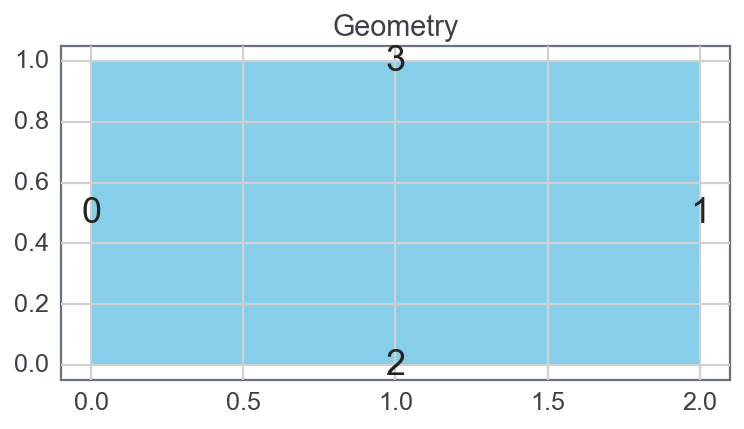

In [6]:
xmin, xmax, ymin, ymax = 0., 2., 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax], 'label': list(range(4))},
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize(viewlabel=True, viewgrid=True, fluid_color='skyblue')

Then, the domain is modified by adding or deleting some elementary shapes. In 2D, the elementary shapes are
* a `Circle`
* an `Ellipse`
* a `Parallelogram`
* a `Triangle`

Geometry informations
	 spatial dimension: 2
	 bounds of the box: 
[[ 0.  2.]
 [ 0.  1.]]
	 List of elements added or deleted in the box
		 Element number 0: Circle([ 0.5  0.5],0.125) (solid)



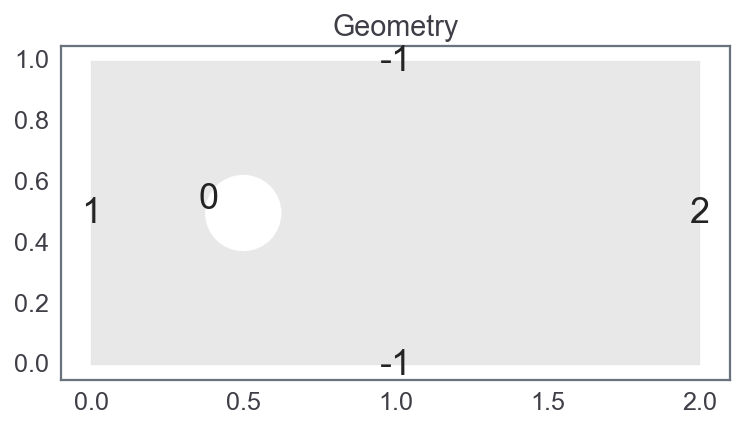

In [7]:
xmin, xmax, ymin, ymax = 0., 2., 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax], 'label': [1,2,-1,-1]},
    'elements': [pyLBM.Circle((.5, .5), .125, label = 0)],
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize(viewlabel=True, viewgrid=False, fluid_color='lightgray', alpha = 0.5)

Geometry informations
	 spatial dimension: 2
	 bounds of the box: 
[[ 0.  5.]
 [ 0.  1.]]
	 List of elements added or deleted in the box
		 Element number 0: Parallelogram([ 2.25  0.  ],[ 0.5  0. ],[ 0.    0.25]) (solid)
		 Element number 1: Parallelogram([ 2.25  1.  ],[ 0.5  0. ],[ 0.   -0.25]) (solid)



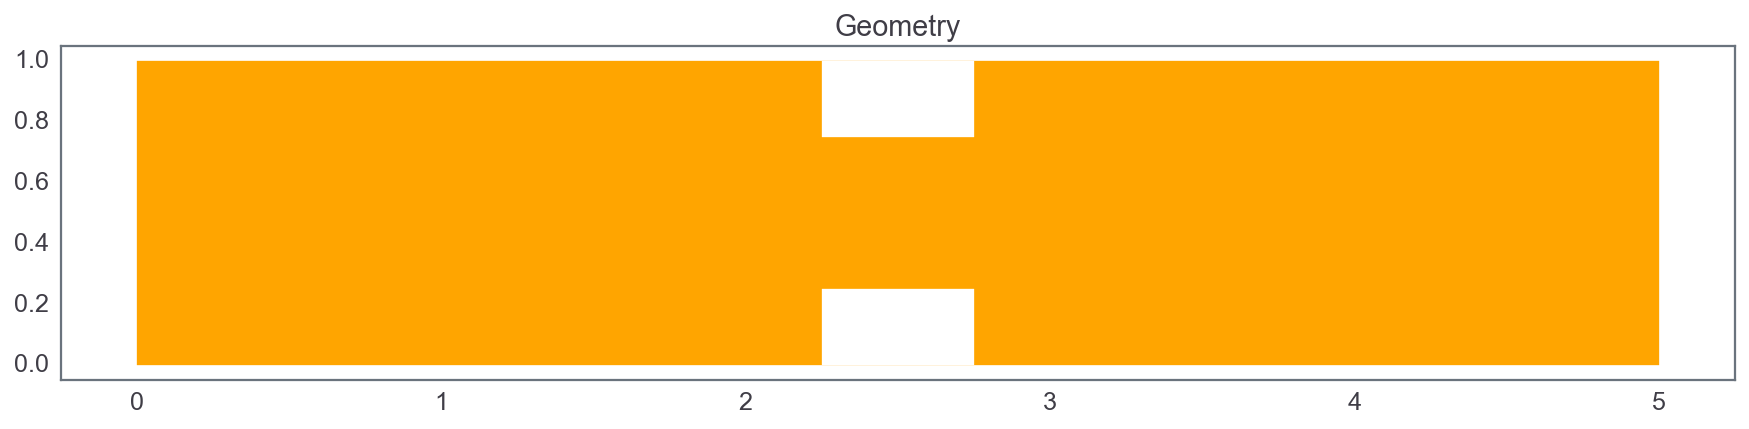

In [8]:
xmin, xmax, ymin, ymax = 0., 5, 0, 1
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax], 'label': 0},
    'elements': [
        pyLBM.Parallelogram((2.25,0.), (.5,0.), (0., .25), label = 1),
        pyLBM.Parallelogram((2.25,1.), (.5,0.), (0.,-.25), label = 0),
    ],
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize(fluid_color='orange', figsize = (15,3))

A complex geometry can be build by using a list of elements. In this example, the box is fixed to the unit square $[0,1]^2$. A square hole is added with the argument `isfluid=False`. A strip and a circle are then added with the argument `isfluid=True`. Finally, a square hole is put. The value of elements contains the list of all the previous elements. Note that the order of the elements in the list is relevant.

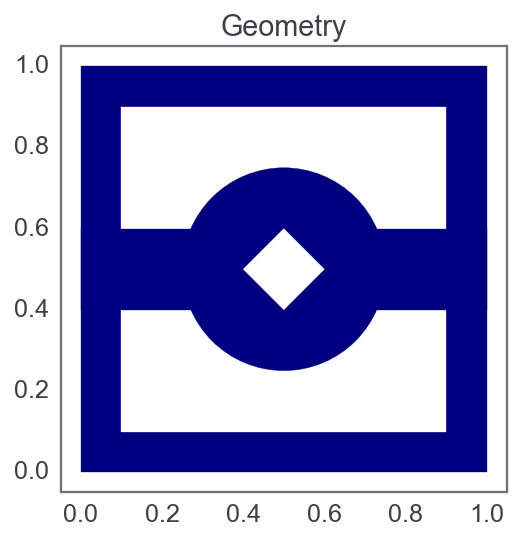

In [9]:
square = pyLBM.Parallelogram((.1, .1), (.8, 0), (0, .8), isfluid=False)
strip = pyLBM.Parallelogram((0, .4), (1, 0), (0, .2), isfluid=True)
circle = pyLBM.Circle((.5, .5), .25, isfluid=True)
inner_square = pyLBM.Parallelogram((.4, .5), (.1, .1), (.1, -.1), isfluid=False)
dico_geom = {
    'box': {'x': [0, 1], 'y': [0, 1], 'label': 0},
    'elements': [square, strip, circle, inner_square],
}
g = pyLBM.Geometry(dico_geom)
g.visualize()

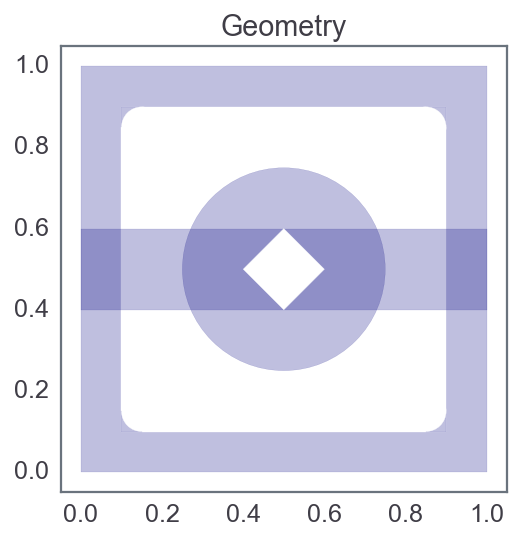

In [10]:
g.add_elem(pyLBM.Parallelogram((0.1, 0.9), (0.05, 0), (0, -0.05), isfluid=True))
g.add_elem(pyLBM.Circle((0.15, 0.85), 0.05, isfluid=False))
g.add_elem(pyLBM.Parallelogram((0.1, 0.1), (0.05, 0), (0, 0.05), isfluid=True))
g.add_elem(pyLBM.Circle((0.15, 0.15), 0.05, isfluid=False))
g.add_elem(pyLBM.Parallelogram((0.9, 0.9), (-0.05, 0), (0, -0.05), isfluid=True))
g.add_elem(pyLBM.Circle((0.85, 0.85), 0.05, isfluid=False))
g.add_elem(pyLBM.Parallelogram((0.9, 0.1), (-0.05, 0), (0, 0.05), isfluid=True))
g.add_elem(pyLBM.Circle((0.85, 0.15), 0.05, isfluid=False))
g.visualize(fluid_color = 'navy', alpha = 0.25)

<div style="color: navy; background-color: skyblue; border: 2px solid navy; padding: 5px;">
  <p style="text-align: center;font-size: 150%">In dimension 3</p>
</div>

In dimension 3, the geometry is also described in a dictionary : the key `box` has to be a dictionary that contains
* the left and the right bounds with the key `x`
* the bottom and the top bounds with the key `y`
* the front and the back bounds with the key `z`
* the labels (by default each label is -1) with the key `label`

The geometry can be visualize as in the following examples.

Geometry informations
	 spatial dimension: 3
	 bounds of the box: 
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]



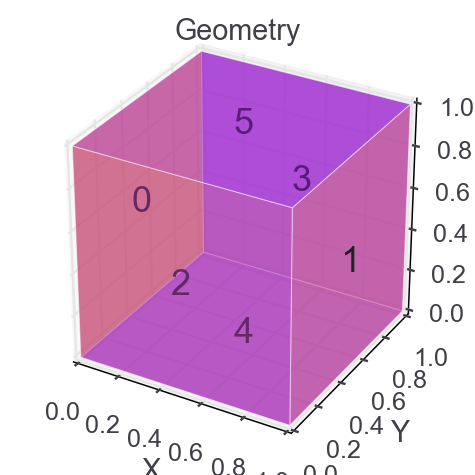

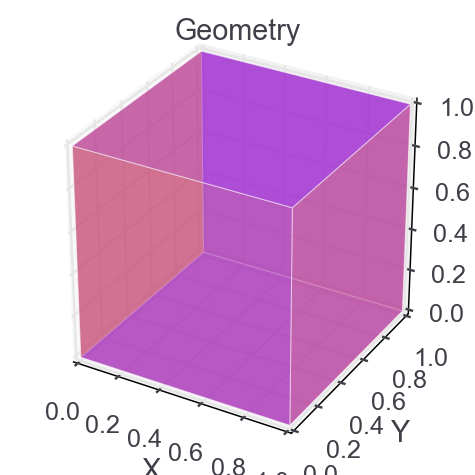

In [11]:
xmin, xmax, ymin, ymax, zmin, zmax = 0., 1., 0., 1., 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax], 'z': [zmin, zmax], 'label': list(range(6))},
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize(viewlabel=True)
geom.visualize()

Geometry informations
	 spatial dimension: 3
	 bounds of the box: 
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
	 List of elements added or deleted in the box
		 Element number 0: Sphere([ 0.5  0.5  0.5],0.25) (solid)



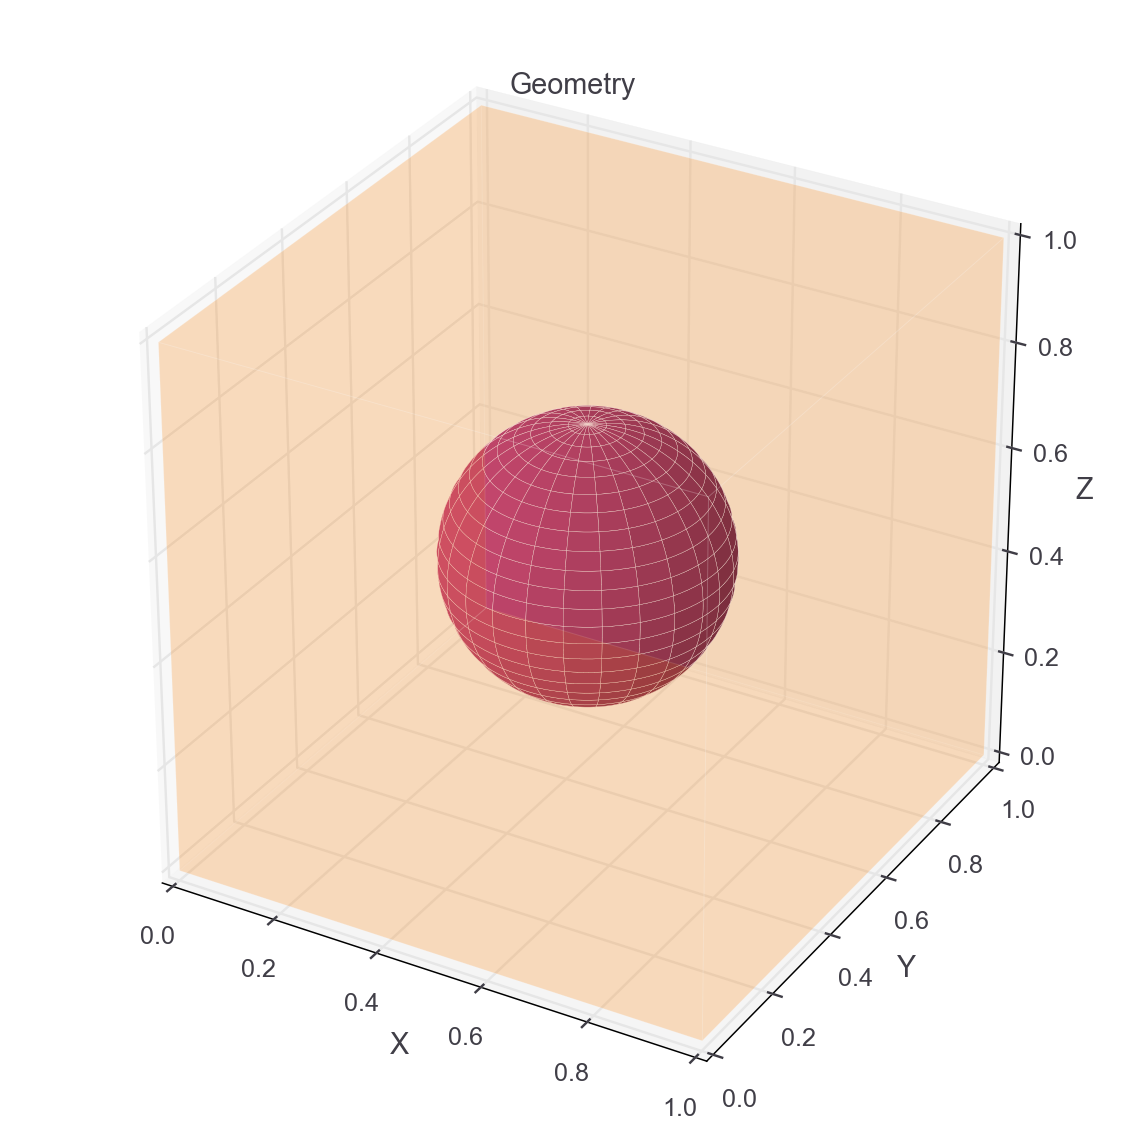

In [13]:
xmin, xmax, ymin, ymax, zmin, zmax = 0., 1., 0., 1., 0., 1.
dico_geom = {
    'box': {'x': [xmin, xmax], 'y': [ymin, ymax], 'z': [zmin, zmax], 'label': 0},
    'elements':[pyLBM.Sphere((.5,.5,.5), .25, label=1)],
}
geom = pyLBM.Geometry(dico_geom)
print(geom)
geom.visualize(viewlabel=False, alpha = 0.125, figsize = (10,10))